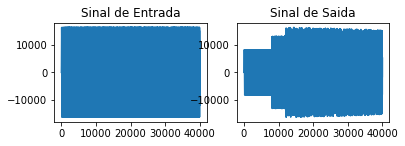

In [30]:
import numpy as np
import matplotlib.pyplot as plt

t1 = 1000 * (10 ** (-3))
t2 = 1500 * (10 ** (-3))

Fs = 8000
a0 = 0.5
a1 = 0.3
a2 = 0.2
n1 = int(Fs * t1)
n2 = int(Fs * t2)

#Lendo arquivos binários
with open ("sweep.pcm", "rb") as f:
        fid = f.read()
        f.close()
entrada = np.frombuffer(fid, dtype = "int16")

delay = np.zeros(n2)
tama_loop = len(entrada)
vet_saida = np.zeros(tama_loop)

#Laço de repetição para calcular o delay
for j in range(tama_loop):
  delay[0] = entrada[j]
  y = a0 * delay[0] + a1 * delay[n1-1] + a2 * delay[n2-1]
  for k in range(n2):
    delay[n2-k-1] = delay[n2-k-2]
    vet_saida[j] = y

#Plotando o gráfico de entrada
plt.subplot(2, 2, 1)
plt.title("Sinal de Entrada")
plt.plot(entrada)

#Plotando o gráfico de saida
plt.subplot(2, 2, 2)
plt.title("Sinal de Saida")
plt.plot(vet_saida)

#Salvando o arquivo de saída
with open("delayFinal.pcm", "wb") as novo:
    for data in delay:
        novo.write(data)
    novo.close()

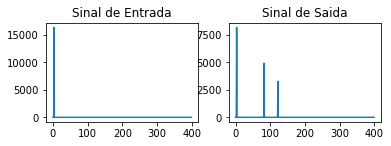